# 

# Plotting Argo data
Plotting Argo data for the entire study region, alterations from original code need to be done to be able to plot such a large data set

In [1]:
# Required Libraries
# If you don't have these libraries installed, you can install them using pip:

import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# The Argopy library used for accessing and working with Argo data
from argopy.plot import scatter_map, scatter_plot  # This is a function to easily make maps and scatter plots
from argopy import ArgoColors
from argopy import ArgoIndex
from argopy import ArgoNVSReferenceTables

In [2]:
# Importing data set 

df = pd.read_parquet('/Users/davidlewis/Desktop/Masters/data/argo/argo_pq/icb_floats_table.parquet')

print(df.head())
print("-----------------------------------------//---------------------------------------------------")
print(df.info())
print("-----------------------------------------//---------------------------------------------------")
print(df.columns)

   CONFIG_MISSION_NUMBER  CYCLE_NUMBER DATA_MODE DIRECTION  PLATFORM_NUMBER  \
0                      2            55         D         A          6900640   
1                      2            55         D         A          6900640   
2                      2            55         D         A          6900640   
3                      2            55         D         A          6900640   
4                      2            55         D         A          6900640   

   POSITION_QC  PRES  PRES_ADJUSTED  PRES_ADJUSTED_ERROR  PRES_ADJUSTED_QC  \
0            1  16.0           16.0                  2.4                 1   
1            1  26.0           26.0                  2.4                 1   
2            1  37.0           37.0                  2.4                 1   
3            1  46.0           46.0                  2.4                 1   
4            1  56.0           56.0                  2.4                 1   

   ...   TEMP  TEMP_ADJUSTED  TEMP_ADJUSTED_ERROR  TEMP_

In [3]:
# Loading data set
df = pd.read_parquet('../data/argo/argo_pq/icb_floats_table.parquet')

## Loading information about the region

In [4]:
# Defining the region and time period of interest
BOX = [-35, -30, 62, 64, 0, 2000, '2010-01', '2024-12']

In [5]:
# Load the BGC-synthetic profiles index
# rq: we work with synthetic profiles because that's the only dataset available from the erddap at this point (2023/07/21)
idx = ArgoIndex(index_file='bgc-s').load()  
idx

<argoindex.pyarrow>
Host: https://data-argo.ifremer.fr
Index: argo_synthetic-profile_index.txt.gz
Convention: argo_synthetic-profile_index (Synthetic-Profile directory file of the Argo GDAC)
In memory: True (363755 records)
Searched: False

In [6]:
# Select profile in a space/time domain:
index_BOX = [BOX[ii] for ii in [0, 1, 2, 3, 6, 7]]  # We don't want the pressure axis BOX limits
idx = idx.query.box(index_BOX) # Had to replace this with something new as argopy has been updated

In [7]:
idx.read_params()

['BBP700',
 'CDOM',
 'CHLA',
 'CHLA_FLUORESCENCE',
 'CP660',
 'DOWNWELLING_PAR',
 'DOWN_IRRADIANCE380',
 'DOWN_IRRADIANCE412',
 'DOWN_IRRADIANCE490',
 'DOXY',
 'NITRATE',
 'PH_IN_SITU_TOTAL',
 'PRES',
 'PSAL',
 'TEMP']

In [8]:
# Extract the list of BGC parameters:
bgc_params = idx.read_params()
#[bgc_params.remove(p) for p in ['PH_IN_SITU_TOTAL', 'BISULFIDE']]  # Remove core variables from the list
bgc_params

['BBP700',
 'CDOM',
 'CHLA',
 'CHLA_FLUORESCENCE',
 'CP660',
 'DOWNWELLING_PAR',
 'DOWN_IRRADIANCE380',
 'DOWN_IRRADIANCE412',
 'DOWN_IRRADIANCE490',
 'DOXY',
 'NITRATE',
 'PH_IN_SITU_TOTAL',
 'PRES',
 'PSAL',
 'TEMP']

## BGC Parameter Map


We can also make a scatter map with one BGC parameter data mode.

In [9]:
# Randomly select one BGC parameter to work with:
a_param = bgc_params[np.random.randint(len(bgc_params))]
a_param

'CHLA'

In [10]:
# Get more verbose information about this parameter (usefull for plot titles):
reftbl = ArgoNVSReferenceTables().tbl('R03')
param_info = reftbl[reftbl['altLabel']==a_param].iloc[0].to_dict()
param_info

{'altLabel': 'CHLA',
 'prefLabel': 'Chlorophyll-A',
 'definition': 'Chlorophyll-a concentration (mg/m^3), reported by ECO3 sensor. Local_Attributes:{long_name:Chlorophyll-A; standard_name:mass_concentration_of_chlorophyll_a_in_sea_water; units:mg/m3; valid_min:-; valid_max:-; category:b; fill_value:99999.f; data_type:float}.',
 'deprecated': 'false',
 'id': 'http://vocab.nerc.ac.uk/collection/R03/current/CHLA/'}

In [11]:
df

,CONFIG_MISSION_NUMBER,CYCLE_NUMBER,DATA_MODE,DIRECTION,PLATFORM_NUMBER,POSITION_QC,PRES,PRES_ADJUSTED,PRES_ADJUSTED_ERROR,PRES_ADJUSTED_QC,...,TEMP,TEMP_ADJUSTED,TEMP_ADJUSTED_ERROR,TEMP_ADJUSTED_QC,TEMP_QC,TIME_QC,VERTICAL_SAMPLING_SCHEME,LATITUDE,LONGITUDE,TIME
0,2,55,D,A,6900640,1,16.000000,16.000000,2.4,1,...,8.6060,8.6060,0.002,1,1,1,"Primary sampling: averaged [10 sec sampling, 2...",60.396,-25.3840,2010-01-01 04:53:00
1,2,55,D,A,6900640,1,26.000000,26.000000,2.4,1,...,8.6080,8.6080,0.002,1,1,1,"Primary sampling: averaged [10 sec sampling, 2...",60.396,-25.3840,2010-01-01 04:53:00
2,2,55,D,A,6900640,1,37.000000,37.000000,2.4,1,...,8.6100,8.6100,0.002,1,1,1,"Primary sampling: averaged [10 sec sampling, 2...",60.396,-25.3840,2010-01-01 04:53:00
3,2,55,D,A,6900640,1,46.000000,46.000000,2.4,1,...,8.6160,8.6160,0.002,1,1,1,"Primary sampling: averaged [10 sec sampling, 2...",60.396,-25.3840,2010-01-01 04:53:00
4,2,55,D,A,6900640,1,56.000000,56.000000,2.4,1,...,8.6170,8.6170,0.002,1,1,1,"Primary sampling: averaged [10 sec sampling, 2...",60.396,-25.3840,2010-01-01 04:53:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6375054,182,182,D,A,1902304,1,1748.900024,1749.250000,2.4,1,...,3.7264,3.7264,0.002,1,1,1,Primary sampling: mixed [deeper than nominal 9...,61.317,-16.0456,2024-11-30 22:52:01
6375055,182,182,D,A,1902304,1,1798.500000,1798.849976,2.4,1,...,3.7093,3.7093,0.002,1,1,1,Primary sampling: mixed [deeper than nominal 9...,61.317,-16.0456,2024-11-30 22:52:01
6375056,182,182,D,A,1902304,1,1849.099976,1849.449951,2.4,1,...,3.7025,3.7025,0.002,1,1,1,Primary sampling: mixed [deeper than nominal 9...,61.317,-16.0456,2024-11-30 22:52:01
6375057,182,182,D,A,1902304,1,1898.300049,1898.650024,2.4,1,...,3.7205,3.7205,0.002,1,1,1,Primary sampling: mixed [deeper than nominal 9...,61.317,-16.0456,2024-11-30 22:52:01


In [12]:
# To make the scatter map, we need to have the data mode available in one DataFrame column
# so we need to add a new column with the DATA_MODE of the PARAMETER:
df["variables"] = df["parameters"].apply(lambda x: x.split())
df["%s_DM" % a_param] = df.apply(lambda x: x['parameter_data_mode'][x['variables'].index(a_param)] if a_param in x['variables'] else '', axis=1)

KeyError: 'parameters'

In [ ]:
np.unique(df["%s_DM" % a_param])

array(['', 'D', 'R'], dtype=object)

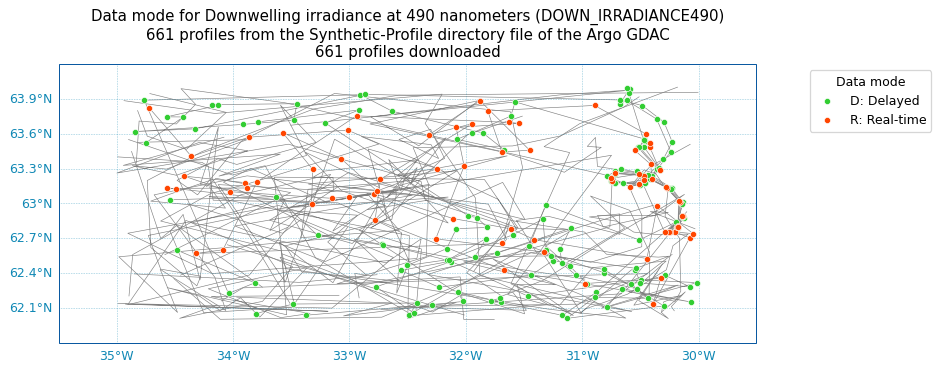

In [ ]:
# Finally plot the map:
fig, ax, artis = scatter_map(df,
                        hue="%s_DM" % a_param,
                        cmap="data_mode",
                        markersize=24,
                        markeredgecolor='w',
                        traj_color='gray',
                        legend_title='Data mode')
ax.set_title("Data mode for %s (%s)\n%i profiles from the %s\n%i profiles downloaded" % (param_info['prefLabel'], a_param, 
                                                                           idx.N_MATCH, idx.convention_title, df.shape[0]));

## Physical Variables

Temperature and Salinity 



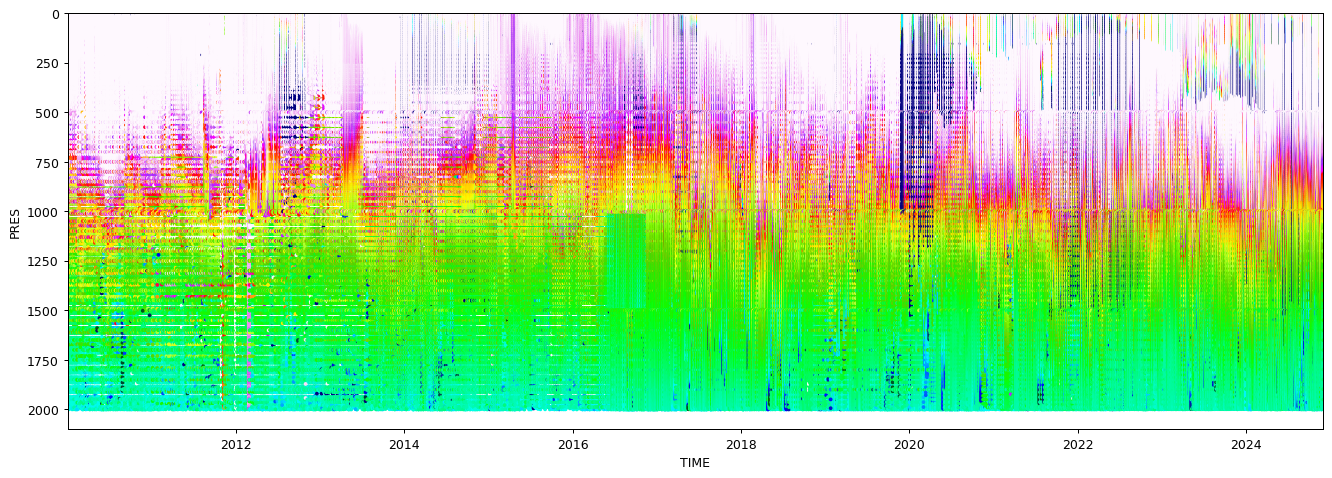

In [13]:
# Crearing graphs for Temperature and Salinity
fig, axes, artis = scatter_plot(df, 'TEMP', vmin=2, vmax=8)

In [ ]:
def plot_transect(p_df, varname = 'TEMP', depth_min = 0, depth_max = 500, log_scale=False):
    # Build dataset from point-form arrays
    ds_points = xr.Dataset(
        {
            "VAR": ("obs", p_df[varname].values),
            "PRES": ("obs", p_df['PRES'].values),
            "TIME": ("obs", p_df['TIME'].values)
        }
    )

    # Unique profile times
    times_unique = np.unique(ds_points['TIME'].values)

    # Regular pressure grid
    depth_grid = np.arange(depth_min, depth_max, 2)  # adjust range and step as needed

    profiles = []
    for t in times_unique:
        # Select all measurements at this time
        mask_time = ds_points['TIME'].values == t
        pres_vals = ds_points['PRES'].values[mask_time]
        var_vals = ds_points['VAR'].values[mask_time]
        
        # Drop NaNs before interpolation
        mask_valid = np.isfinite(pres_vals) & np.isfinite(var_vals)
        if mask_valid.sum() > 1:
            var_interp = np.interp(depth_grid, pres_vals[mask_valid], var_vals[mask_valid],
                                    left=np.nan, right=np.nan)
        else:
            var_interp = np.full_like(depth_grid, np.nan, dtype=float)
        profiles.append(var_interp)

    # Convert to xarray DataArray for plotting
    var_section = xr.DataArray(
        np.array(profiles),
        coords={"TIME": times_unique, "PRES": depth_grid},
        dims=("TIME", "PRES")
    )
    units = p_df[varname].attrs['units']

    # Plot section
    plt.figure(figsize=(12, 6))
    if log_scale:
        pcm = plt.pcolormesh(
        var_section['TIME'],
        var_section['PRES'],
        var_section.T,
        shading='auto',
        cmap='viridis',
        norm=LogNorm(vmin=1e-3, vmax=np.nanmax(var_section))  # adjust vmin as needed
    )
    else:
        pcm = plt.pcolormesh(var_section['TIME'], var_section['PRES'], var_section.T,
                            shading='auto', cmap='viridis')
    plt.gca().invert_yaxis()
    plt.colorbar(pcm, label=f'{varname} {units}')
    plt.xlabel('Time')
    plt.ylabel('Pressure (dbar)')
    plt.title(f'BGC-Argo {varname} Section (Depth vs Time)')
    plt.tight_layout()
    plt.show()

In [ ]:
plot_transect(p_df, 'TEMP', depth_max = 500, log_scale=False)

KeyError: 'TEMP'